In [1]:
# genre feature training

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
pd.options.display.max_columns = 10000

In [76]:
#read in new df from preprocessing
df = pd.read_csv('preprocessed_letterboxd.csv')

In [77]:
df.head()

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star,genre,year_isna,animation,horror,scifi,thriller,war
0,Get Out,2017.0,Jordan Peele,104,605132,261668,4.1,647,1560,1001,5727,5821,34069,45053,136842,65726,110264,horror,False,0,1,0,0,0
1,Zombieland,2009.0,Ruben Fleischer,88,339357,77110,3.6,477,1384,1353,6280,9055,37228,43168,53117,10931,11907,horror,False,0,1,0,0,0
2,Suspiria,2018.0,Luca Guadagnino,152,122728,37820,3.7,611,1253,1266,4151,4844,12282,15033,25865,13732,12889,horror,False,0,1,0,0,0
3,Halloween,1978.0,John Carpenter,91,212751,59124,4.0,204,700,602,3003,3627,15715,17598,35627,14882,29077,horror,False,0,1,0,0,0
4,Rosemary's Baby,1968.0,Roman Polanski,137,158689,46272,4.2,156,372,253,1326,1412,6933,9562,27455,18616,24435,horror,False,0,1,0,0,0


In [78]:
df.describe(include='all')

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star,genre,year_isna,animation,horror,scifi,thriller,war
count,40018,40018.000000,40018,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018,40018,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000
unique,30378,NaN,16293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,2,NaN,NaN,NaN,NaN,NaN
top,Frankenstein,NaN,directorNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,thriller,False,NaN,NaN,NaN,NaN,NaN
freq,18,NaN,382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12836,39998,NaN,NaN,NaN,NaN,NaN
mean,NaN,1993.910465,NaN,80.726548,6826.995702,1316.224424,2.972707,54.423484,111.778300,105.667125,293.829577,309.652281,720.899595,614.732420,820.867235,299.167150,403.334599,NaN,NaN,0.202984,0.276176,0.145609,0.320756,0.054475
std,NaN,50.558016,NaN,42.044645,34009.245241,9260.254979,0.473895,329.131089,570.423667,474.780097,1275.813010,1253.326690,3208.731177,2979.839044,5347.700701,2518.510737,4304.396370,NaN,NaN,0.402225,0.447110,0.352719,0.466773,0.226956
min,NaN,0.000000,NaN,1.000000,33.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1982.000000,NaN,73.000000,109.250000,11.000000,2.700000,1.000000,2.000000,3.000000,8.000000,8.000000,13.000000,7.000000,4.000000,1.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,2004.000000,NaN,90.000000,288.000000,34.000000,3.000000,4.000000,8.000000,9.000000,20.000000,21.000000,36.000000,22.000000,15.000000,3.000000,4.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,2014.000000,NaN,100.000000,1271.000000,165.000000,3.300000,16.000000,31.000000,33.000000,82.000000,90.000000,172.000000,113.000000,87.000000,18.000000,22.000000,NaN,NaN,0.000000,1.000000,0.000000,1.000000,0.000000


In [73]:
# genre feature model training

In [88]:
model = LinearRegression()

In [89]:
X = df['likes']

In [90]:
y = df['avg_rating']

In [93]:
X_train_true, X_test_true, y_train_true, y_test_true = train_test_split(X, y, test_size = 0.3, random_state=42)

In [97]:
X_train_true = X_train_true.values.reshape(-1,1)
y_train_true = y_train_true.values.reshape(-1,1)

In [98]:
model.fit(X_train_true, y_train_true)

LinearRegression()

In [100]:
X_test_true = X_test_true.values.reshape(-1,1)

In [101]:
y_test_pred = model.predict(X_test_true)

In [80]:
model.score(X_test_true, y_test_true)

0.1145999775841765

In [102]:
# predictive power for this feature
model.coef_

array([[9.99113996e-06]])

In [107]:
# pd.Series(y_test_pred).unique()

In [104]:
rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
rmse

0.4675207942245636

In [86]:
y_error = y_test_pred - y_test_true
y_error

6070     0.439453
5811    -0.160547
2299     0.312469
8671    -0.087531
12409   -0.760547
           ...   
5468    -0.378473
6280     0.212469
5953    -0.587531
5795    -0.099945
8192    -0.060547
Name: avg_rating, Length: 12006, dtype: float64

In [87]:
standard_error = ((y_error**2).mean())**0.5
standard_error

0.44871736426958847

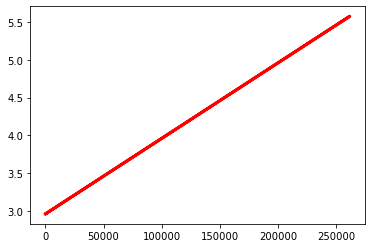

In [106]:
plt.plot(X_test_true, y_test_pred, color='red',linewidth=3)
plt.show()

In [108]:
#likes and views

In [115]:
X = np.asarray(df[['views', 'likes']])

In [116]:
y = np.asarray(df['avg_rating'])

In [117]:
X_train_true, X_test_true, y_train_true, y_test_true = train_test_split(X, y, test_size = 0.3, random_state=42)

In [118]:
model.fit(X_train_true, y_train_true)

LinearRegression()

In [119]:
model.score(X_test_true, y_test_true)

0.041397519544677075

In [120]:
y_test_pred = model.predict(X_test_true)

In [121]:
rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
rmse

0.4668984002461756

In [ ]:
#likes, views and running time

In [122]:
X = np.asarray(df[['views', 'likes', 'running_time' ]])

In [123]:
X_train_true, X_test_true, y_train_true, y_test_true = train_test_split(X, y, test_size = 0.3, random_state=42)

In [124]:
model.fit(X_train_true, y_train_true)

LinearRegression()

In [125]:
model.score(X_test_true, y_test_true)

0.059547456008833155

In [126]:
y_test_pred = model.predict(X_test_true)

In [127]:
rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
rmse

0.4624572096906384

In [ ]:
# likes, views, 